In [1]:
import json
import pydot
import requests
import graphviz
import numpy as np
import pandas as pd
import sklearn as sk
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay


In [2]:
# read csv
data = pd.read_csv('DataTableToRegress-Forest.csv')
featnames = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']
# data.describe

In [3]:
# train_test_split
# X = pd.DataFrame(data[features], columns=features)  # Features
X = data[featnames]  # Features

y = data['Tot Vol Frac Other']
# y = data['Acceptable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
## initialize model
rf_clf = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42) #random_state=42
rf_clf.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)

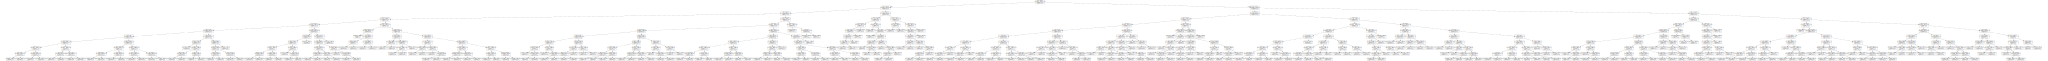

In [5]:
# Plot a decision tree
index = 5
tree = rf_clf.estimators_[index]
from IPython.display import display
columns = list(X_train.columns)
display(graphviz.Source(export_graphviz(tree, feature_names=featnames, class_names=True, out_file=None)))

# Save image to png file
export_graphviz(tree, out_file = 'tree.dot', feature_names = featnames, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

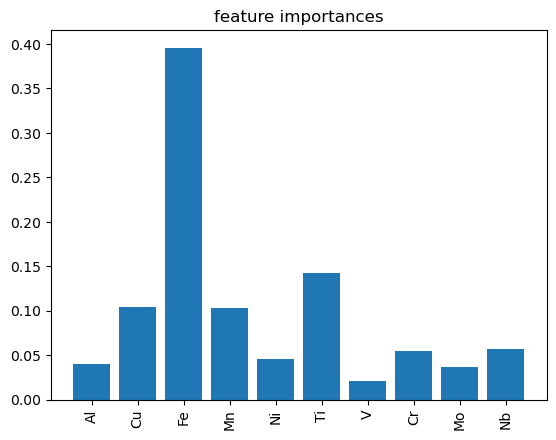

In [6]:
# Plot importances
importances = list(rf_clf.feature_importances_)
labeled_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]
indices = range(len(importances))
plt.bar(indices, importances, orientation = 'vertical')
plt.title('feature importances')
plt.xticks(indices, X, rotation='vertical')
plt.show()

In [7]:
#predictions 
# help(r2_score)

y_hat = rf_clf.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(f'R2 Score: {r2}')

ev = explained_variance_score(y_test, y_hat)
print(f'EV Score: {ev}')

R2 Score: 0.8682511417784097
EV Score: 0.8688687765143581


In [8]:
assert r2 > 0.7
assert ev > 0.7

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_hat)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_hat)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 0.0508496231539117
Mean Squared Error (MSE): 0.008364944620238252
Root Mean Squared Error (RMSE): 0.09146007117993213


Certainly! When evaluating regression models, such as the one you've trained, lower values for error metrics are generally considered better, indicating a closer fit of the predicted values to the true values. Let's discuss each of these error metrics and how to interpret them:

1. **Mean Absolute Error (MAE):**
   - MAE represents the average absolute differences between the predicted values and the true values. 
   - Interpretation: An MAE of 0.0917 means, on average, your predictions are off by approximately 0.0917 units from the true values. Lower MAE indicates better accuracy.

2. **Mean Squared Error (MSE):**
   - MSE measures the average of the squared differences between predicted and true values.
   - Interpretation: An MSE of 0.0488 means, on average, the squared differences between your predictions and true values amount to 0.0488. Lower MSE indicates better accuracy.

3. **Root Mean Squared Error (RMSE):**
   - RMSE is the square root of MSE and is expressed in the same units as the target variable.
   - Interpretation: An RMSE of 0.2209 means, on average, your predictions are off by approximately 0.2209 units from the true values in the original unit of the target variable. Lower RMSE indicates better accuracy.

In summary, lower values for MAE, MSE, and RMSE are desirable as they indicate a smaller average difference between predicted and true values. This suggests that your model is performing well in terms of accuracy and precision. Always aim for the lowest possible values for these error metrics.

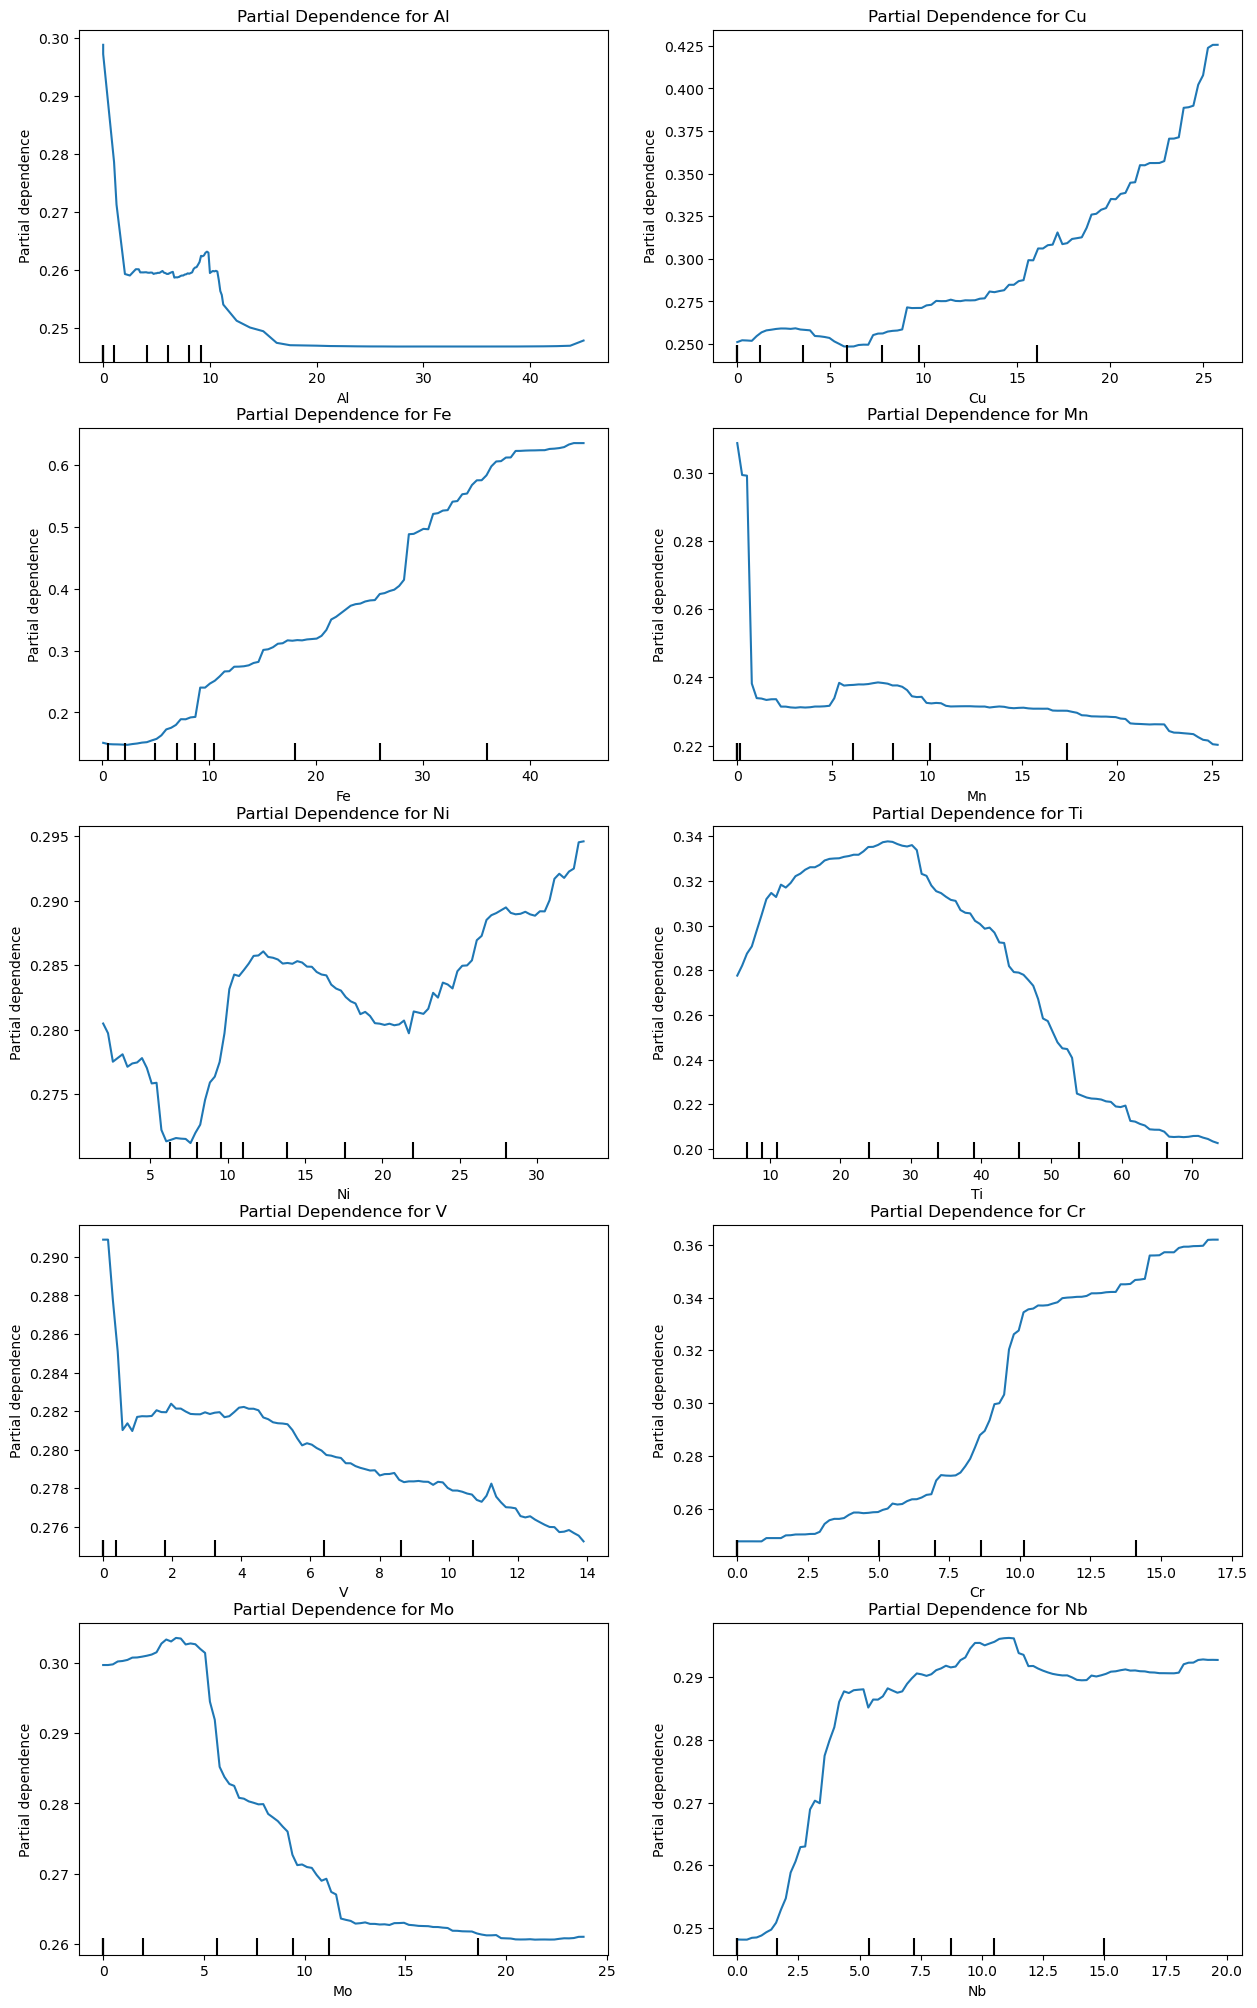

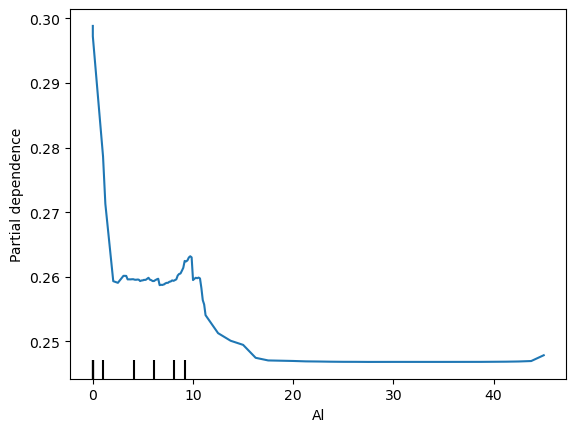

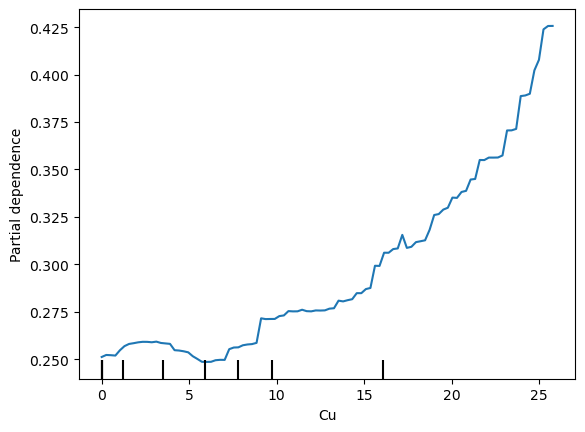

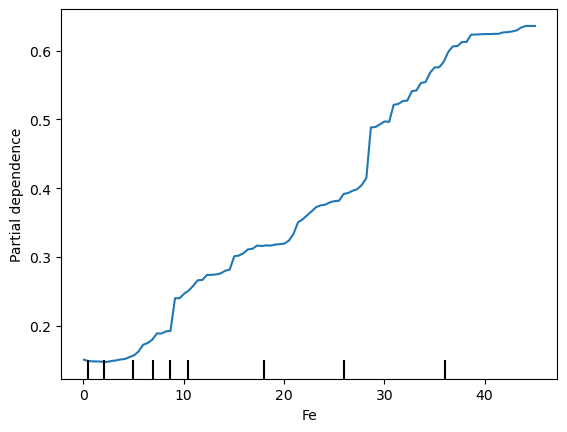

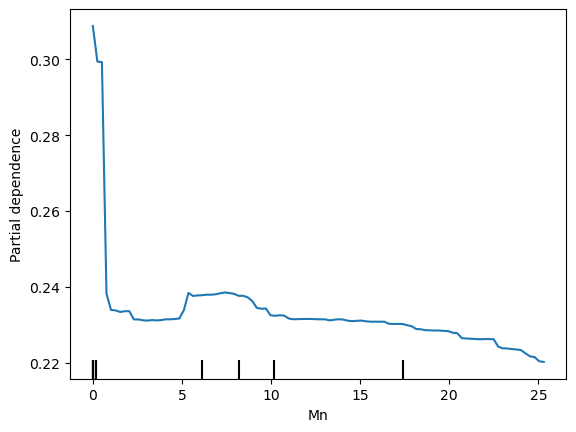

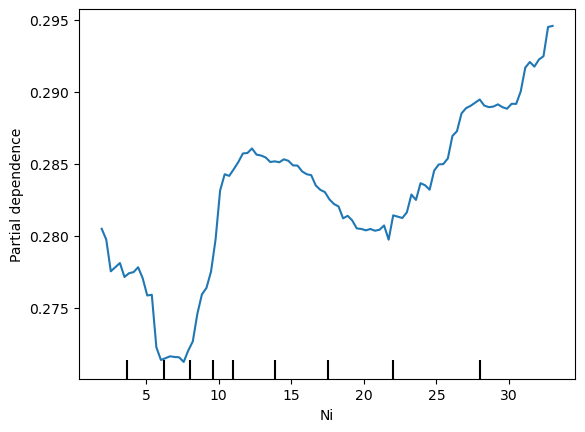

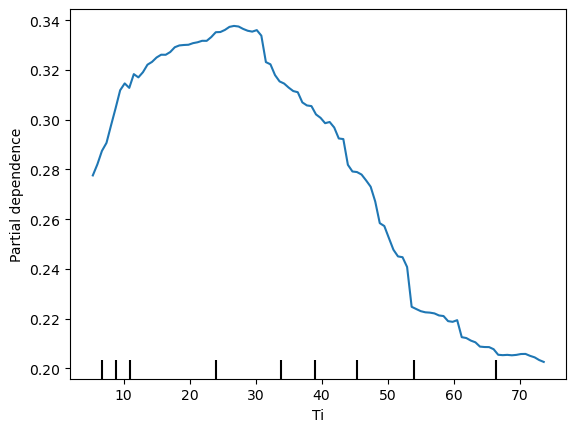

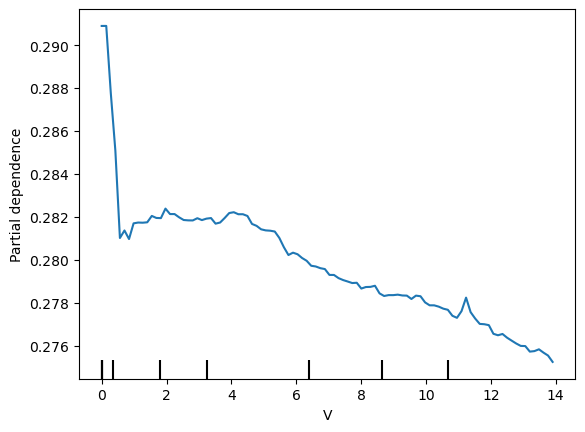

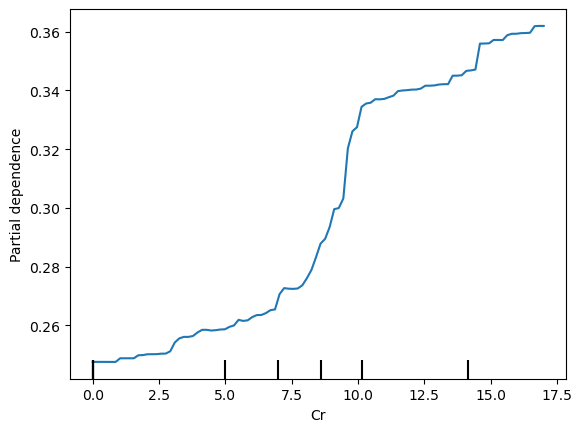

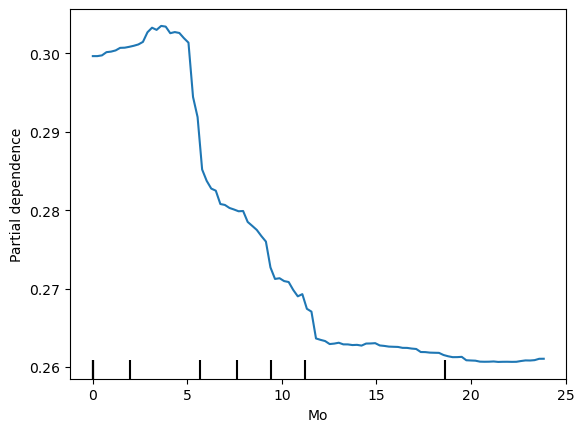

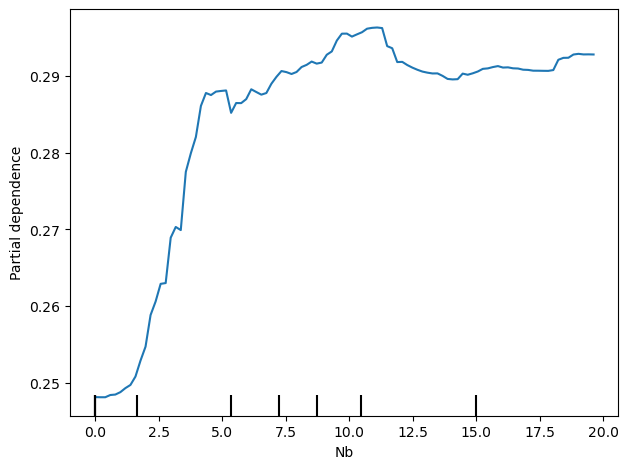

In [22]:
from math import ceil

# Get the number of features
num_features = X_train.shape[1]

# Calculate the number of rows needed for a 2-column layout
num_rows = ceil(num_features / 2)

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten the axes array in case we have only one row
axs = axs.flatten()

# Loop through each feature and plot its partial dependence
for i in range(num_features):
    row = i // 2
    col = i % 2
    feature_to_display = [(i,)]
    disp = PartialDependenceDisplay.from_estimator(rf_clf, X_train, features=feature_to_display)
    disp.plot(ax=axs[i])
    axs[i].set_title(f'Partial Dependence for {featnames[i]}')
    axs[i].set_xlabel(f'Feature {i}')
    axs[i].set_ylabel('Partial Dependence')

# Hide any empty subplots
for i in range(num_features, num_rows * 2):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


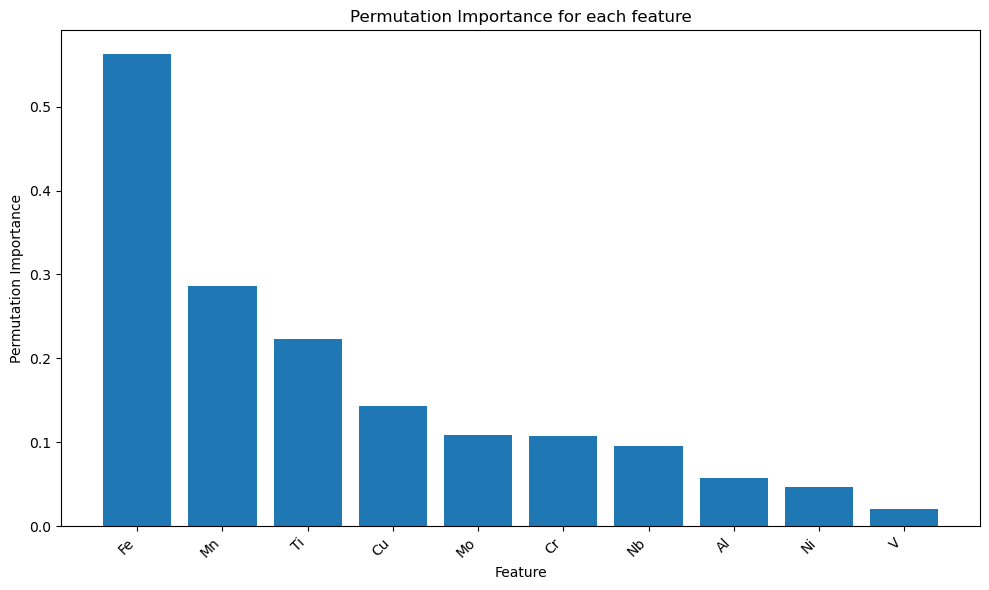

In [23]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state=0)

# Get the sorted indices of feature importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(X_test.shape[1]), np.array(featnames)[sorted_idx], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance for each feature')
plt.tight_layout()
plt.show()


In [29]:
featnames = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']
Ele = 'Ti'

try:
    position = featnames.index(Ele)
    print(f"The position of '{Ele}' in featnames is: {position}")
except ValueError:
    print(f"'{Ele}' is not found in featnames.")


The position of 'Ti' in featnames is: 5


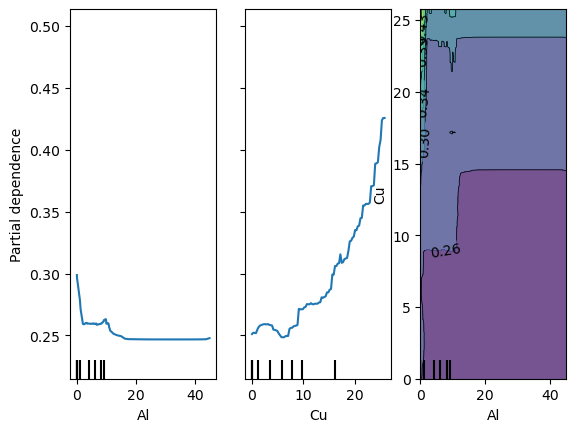

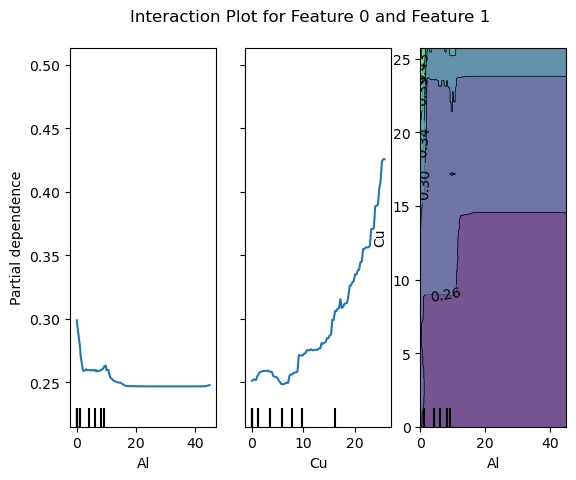

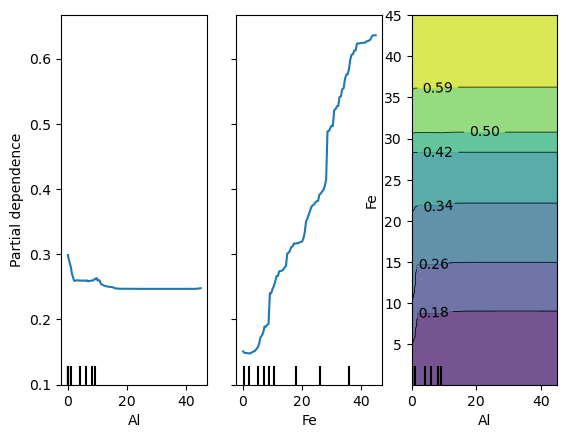

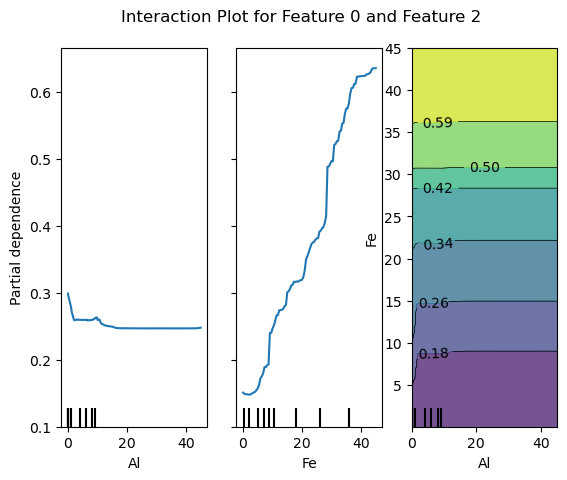

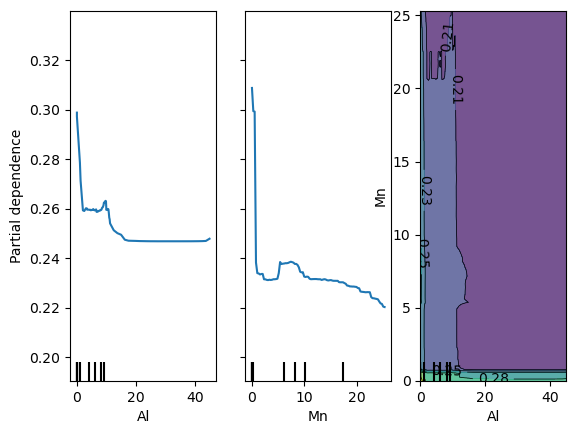

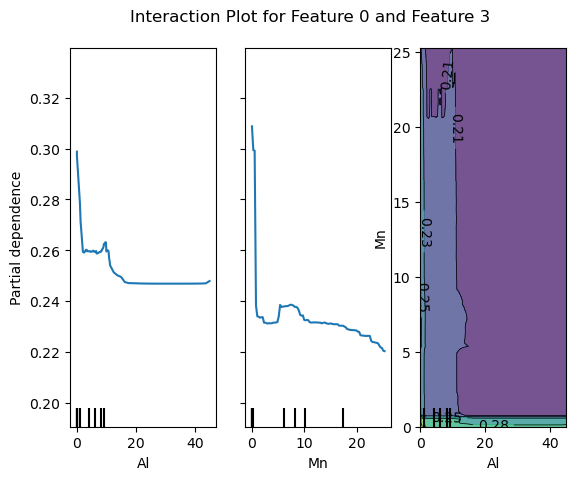

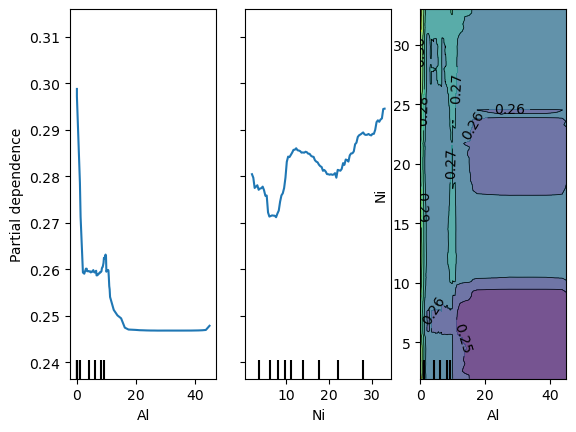

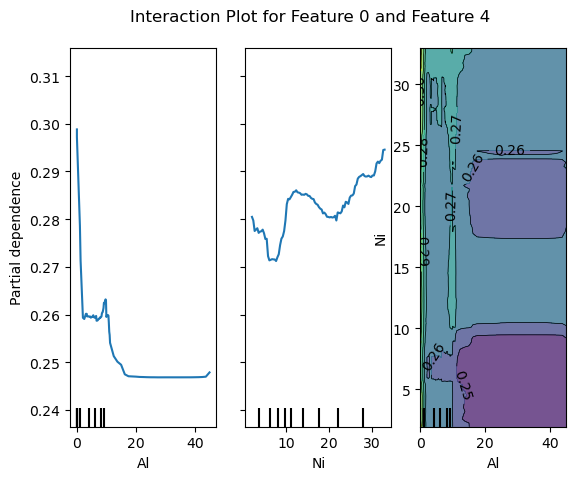

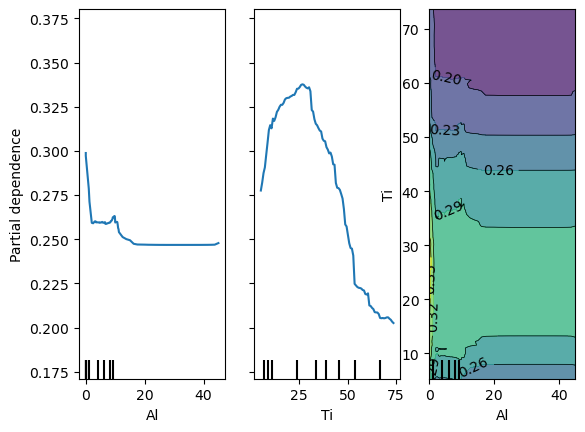

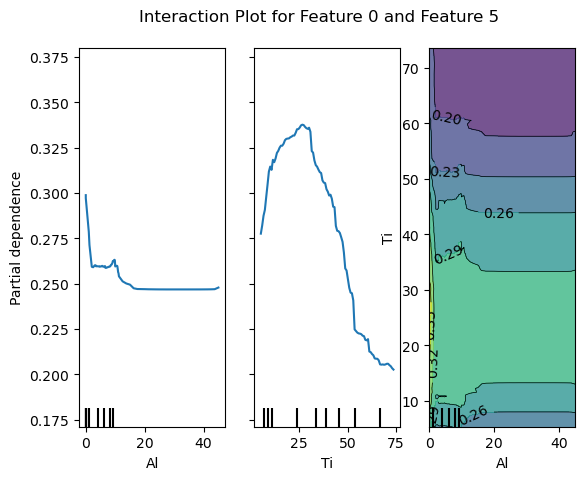

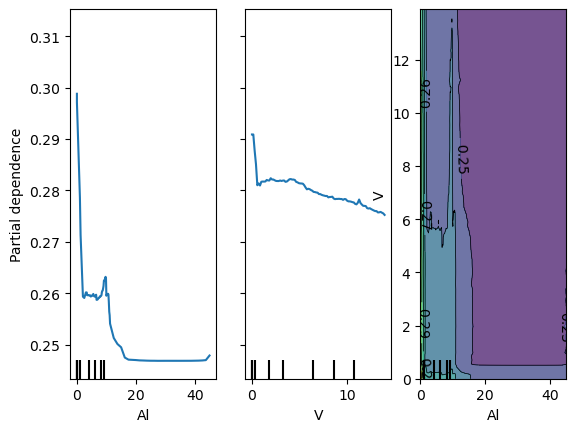

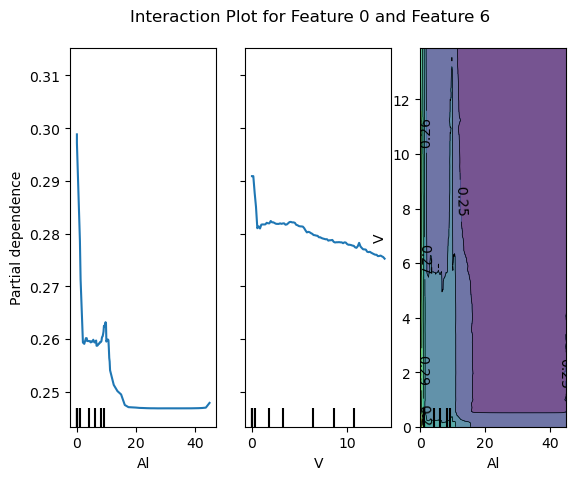

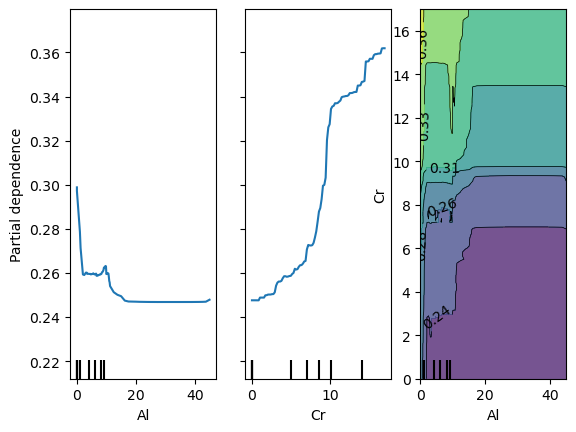

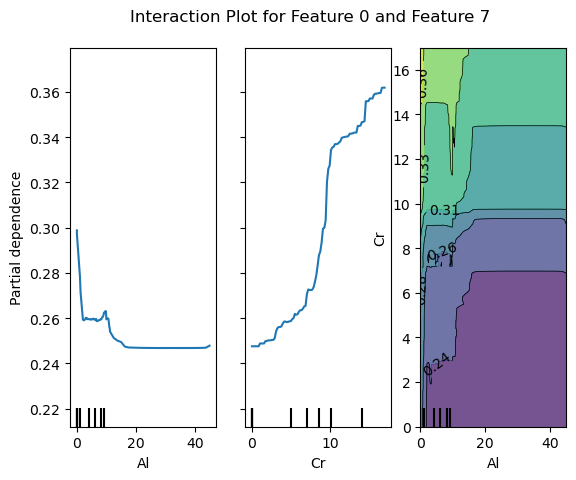

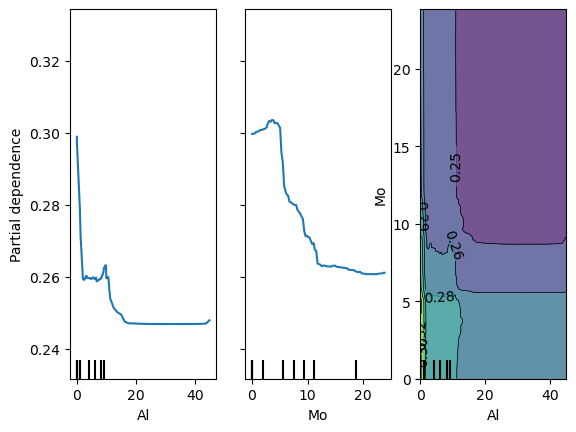

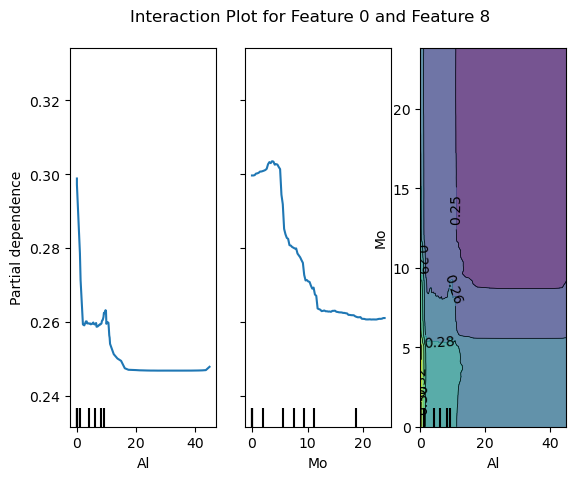

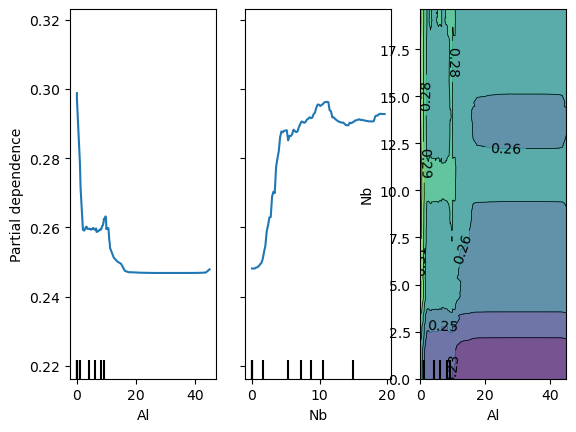

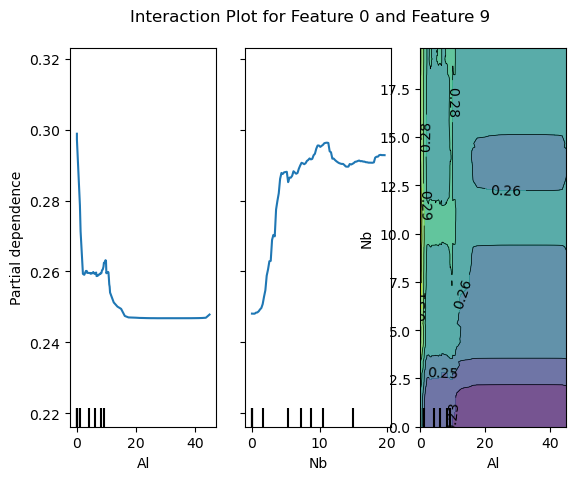

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor

# Assuming rf_clf is your trained RandomForestRegressor
# Assuming X_train is your training data
# Assuming featnames contains your feature names

# Plot interaction plots for the first feature with each of the other features
for i in range(1, X_train.shape[1]):
    features = [0, i, (0,i)]  # 0 is the first feature, i varies from 1 to n_features-1
    display = PartialDependenceDisplay.from_estimator(rf_clf, X_train, features,
                                                      feature_names=featnames)
#     display.plot()
    plt.suptitle(f'Interaction Plot for Feature 0 and Feature {i}')
    plt.subplots_adjust(top=0.9)  # Adjust subplot spacing for the title
    plt.show()


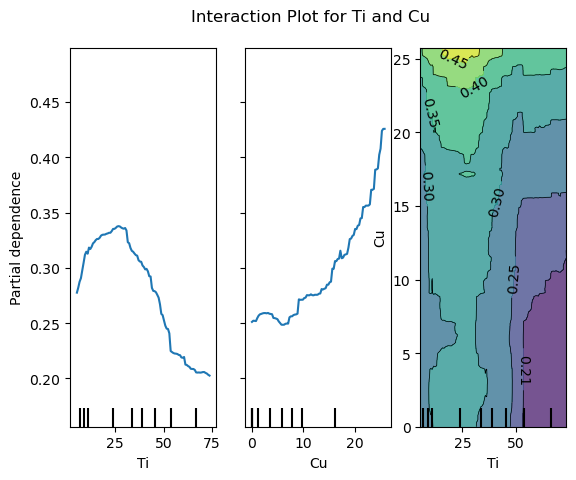

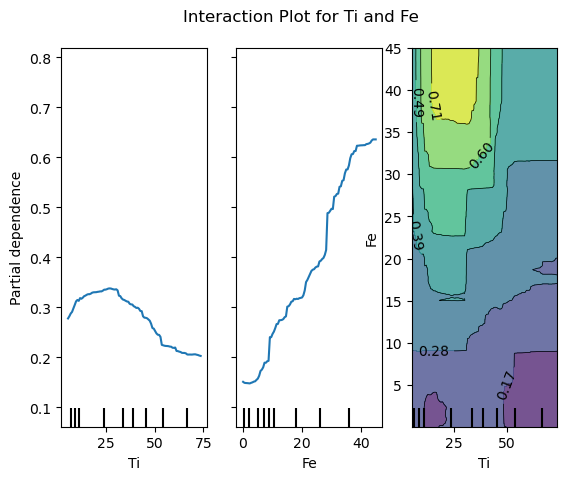

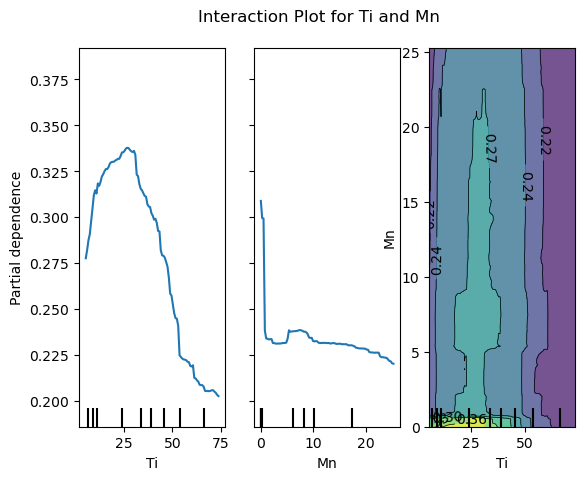

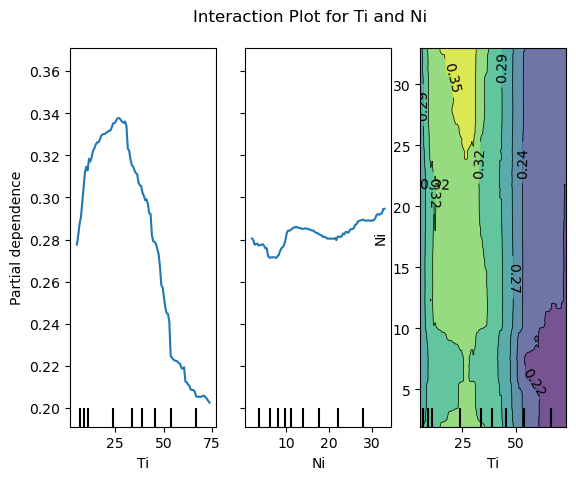

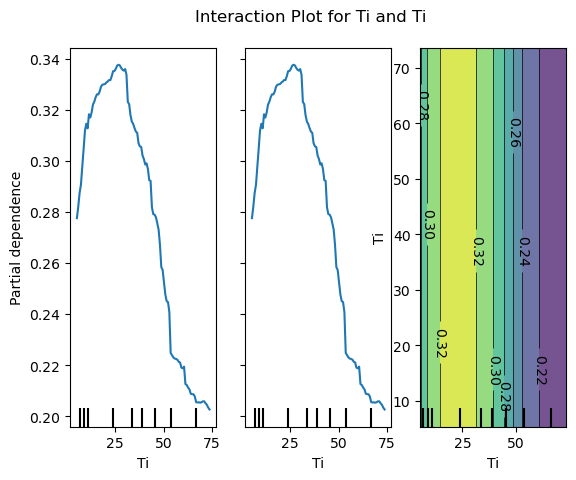

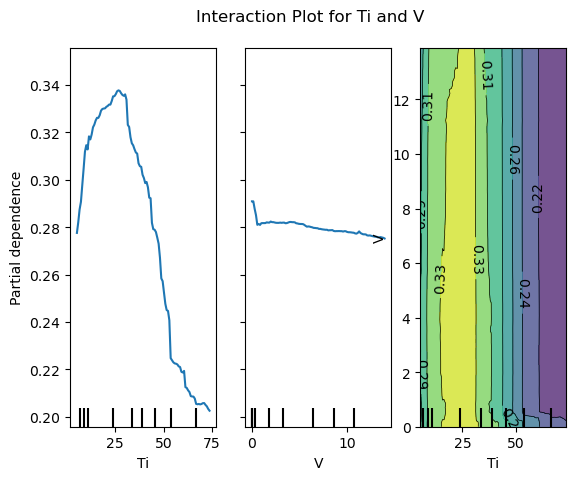

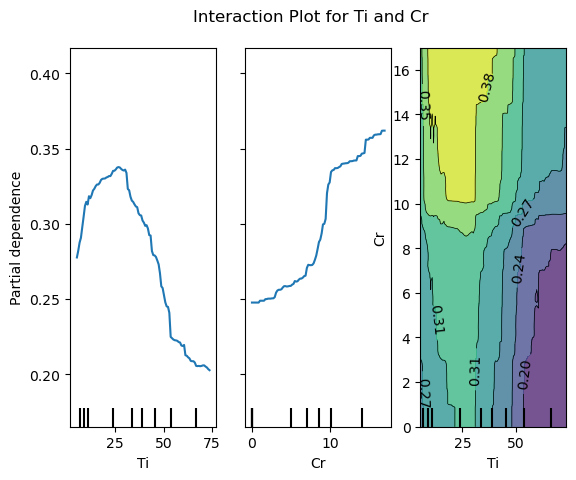

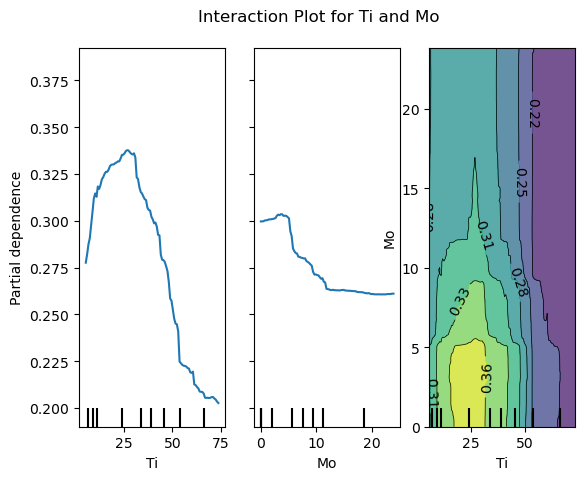

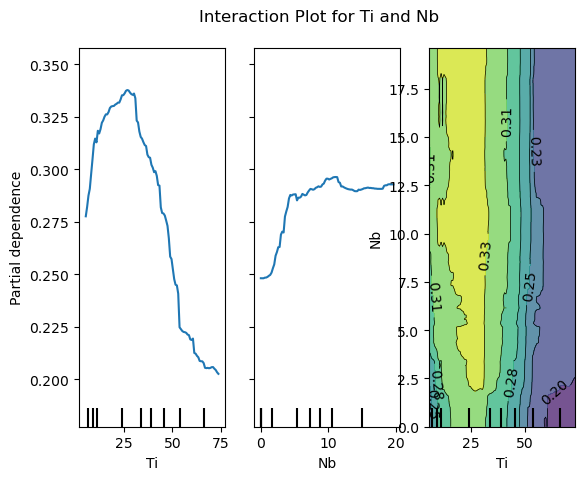

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor

# Assuming rf_clf is your trained RandomForestRegressor
# Assuming X_train is your training data
# Assuming featnames contains your feature names

# Plot interaction plots for the first feature with each of the other features
for i in range(1, X_train.shape[1]):
    features = [5, i, (5,i)]  # 0 is the first feature, i varies from 1 to n_features-1
    display = PartialDependenceDisplay.from_estimator(rf_clf, X_train, features,
                                                      feature_names=featnames)
#     display.plot()
    plt.suptitle(f'Interaction Plot for {featnames[5]} and {featnames[i]}')
    plt.subplots_adjust(top=0.9)  # Adjust subplot spacing for the title
    plt.show()


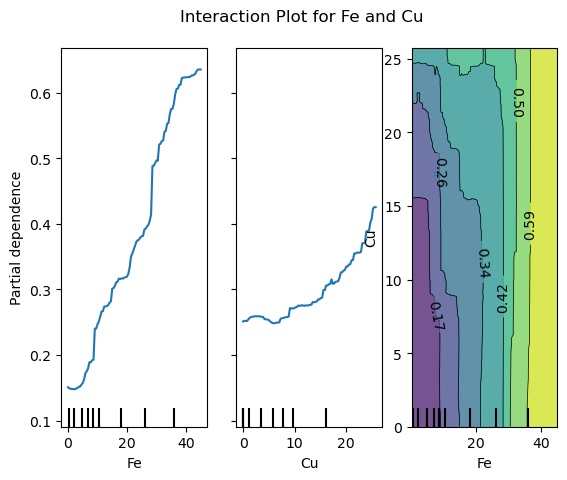

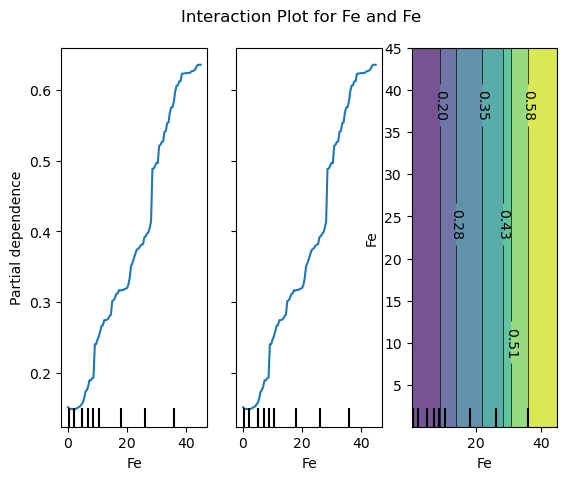

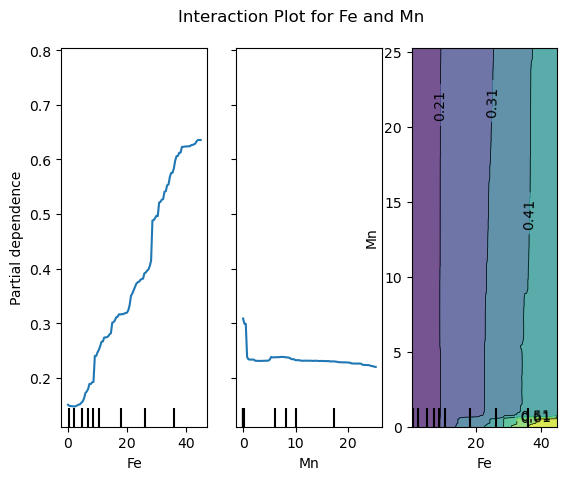

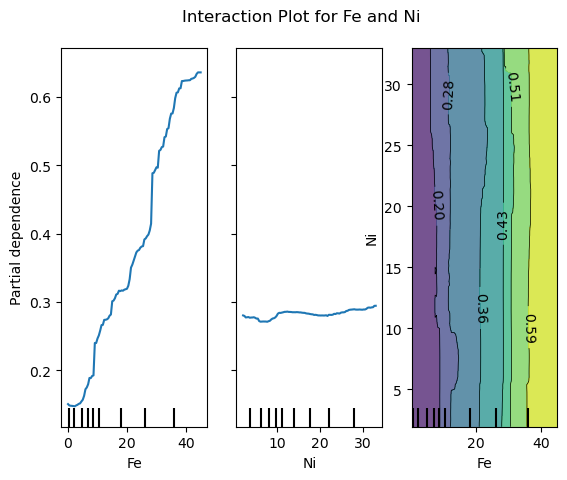

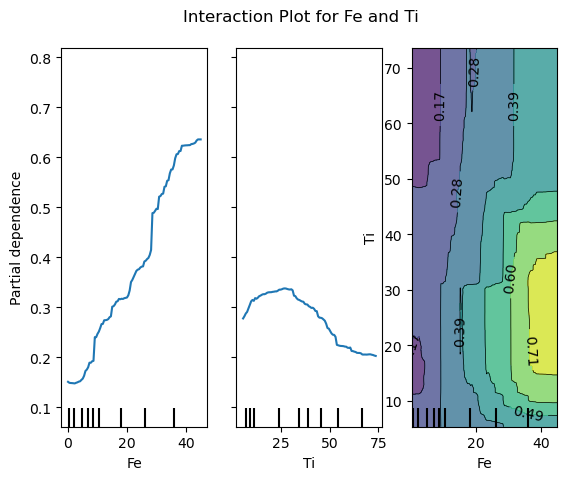

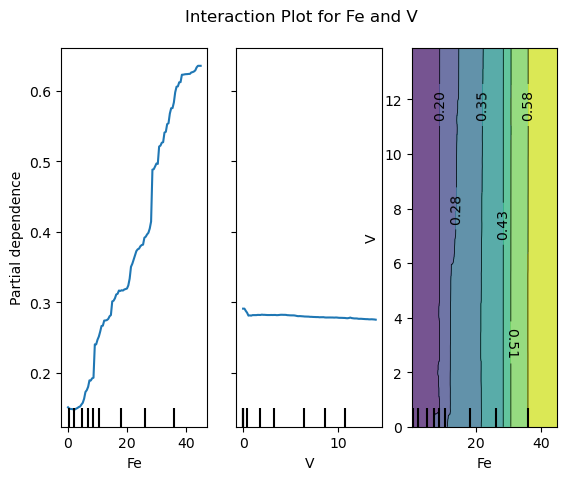

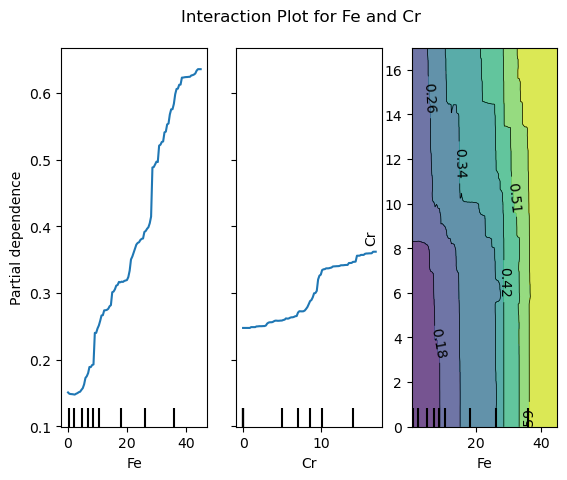

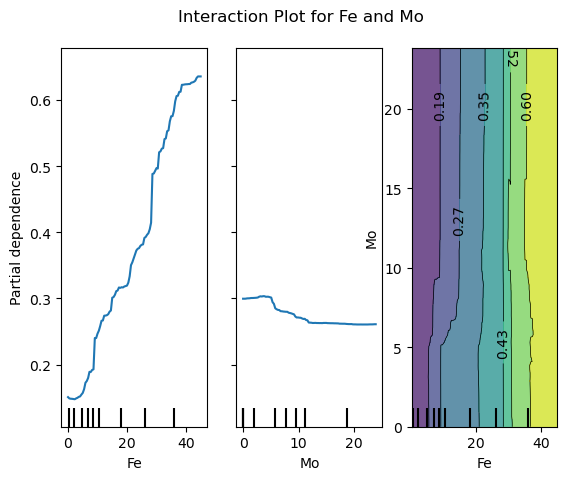

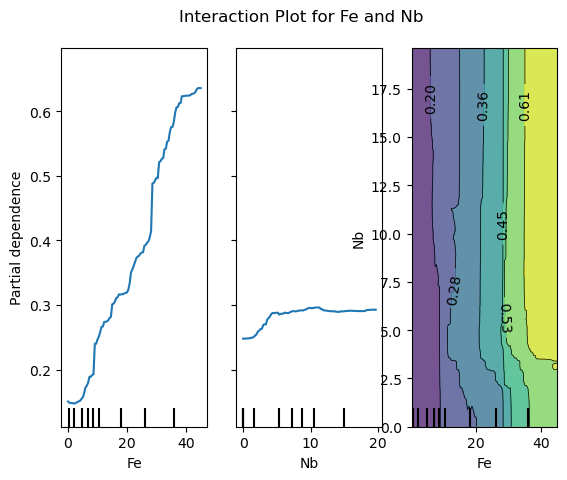

In [30]:
Ele = 'Fe'
position = featnames.index(Ele)

# Plot interaction plots for the first feature with each of the other features
for i in range(1, X_train.shape[1]):
    features = [position, i, (position,i)]  # 0 is the first feature, i varies from 1 to n_features-1
    display = PartialDependenceDisplay.from_estimator(rf_clf, X_train, features,
                                                      feature_names=featnames)
#     display.plot()
    plt.suptitle(f'Interaction Plot for {featnames[position]} and {featnames[i]}')
    plt.subplots_adjust(top=0.9)  # Adjust subplot spacing for the title
    plt.show()
